# This notebook compares the ML sampling predictions with ranks determined by Dr. Jeffrey

In [36]:
from create_model import *
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reads in file containing ranks for each star in cluster

In [37]:
column_names = ['file', 'star', 'rank']
rank_6819 = pd.read_csv( '/Users/justycewatson/Desktop/CIERA_files/NGC6819/ngc6819_checkRes_all.txt',sep='\s+',names=column_names, skiprows=1)
rank_6819= rank_6819.drop('file', axis=1)

rank_6819

# rank 1 - good sampling (chain converges reasonably)
# rank 2 - poor sampling (no sampling or highly correlated)
# rank 3 - parts of chain seem convergent
# rank 4 - flat distribution 

star  rank
0     2076220554197701504     4
1     2076220829075672960     4
2     2076220966514688128     3
3     2076224784750223232     4
4     2076227116907912960     4
...                   ...   ...
1683  2076616859415037824     3
1684  2076617276038017664     4
1685  2076617447828109440     4
1686  2076617477890443008     2
1687  2076619028384704000     4

[1688 rows x 2 columns]

# Creates df of features and runs new dataset through model to get predictions

In [51]:
directory = '/Users/justycewatson/Desktop/CIERA_files/NGC6819/ngc6819_single_resfiles' 
ngc6819_statistic = create_features(directory)

ngc6819_clean, ngc6819_array = prepare_df_for_model(ngc6819_statistic)
ngc6819_array

pipe = load_model('my_model.pkl')

y_pred_6819 = make_preds(pipe,ngc6819_array)

In [53]:
rank_6819['star'] = rank_6819['star'].astype('str')
ngc6819_statistic['source_id'] = ngc6819_statistic['source_id'].astype('str')

# Merges df with ranks and df with ML predictions based on the source ids

In [54]:
# ngc6819_statistic['source_id'] = ngc6819_statistic['source_id'].str.extract(r'gaia_(\d+)_sin2')
# this line removes other words in source ids and leaves just the number and is commented out after running once

ngc6819_statistic['y_pred'] = y_pred_6819
ngc6819_statistic

ngc6819_statistic = pd.merge(ngc6819_statistic, rank_6819, left_on='source_id', right_on='star', how='inner')
ngc6819_statistic = ngc6819_statistic.drop('star', axis=1)

# Plots rank number vs the ML predictions

In [32]:
y_pred_good = ngc6819_statistic[ngc6819_statistic['y_pred'] == 'Good']
y_pred_bad = ngc6819_statistic[ngc6819_statistic['y_pred'] == 'Bad']

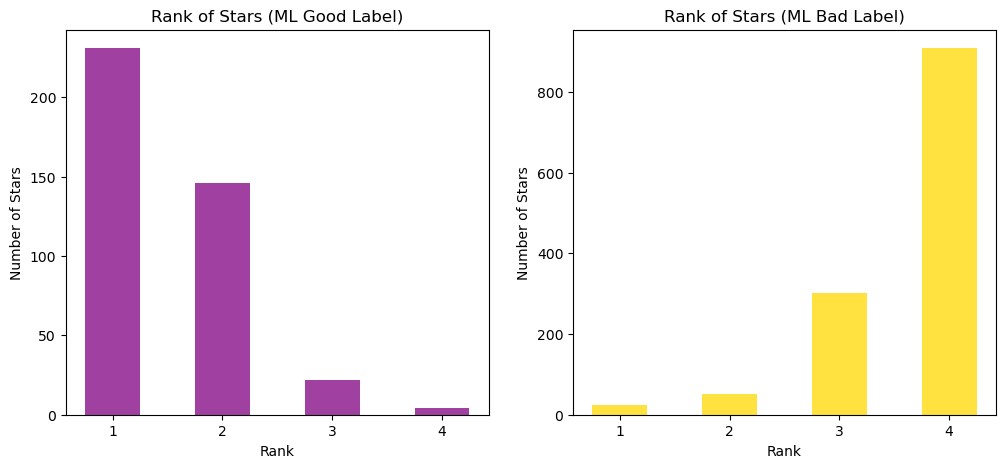

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

rank_counts_good = y_pred_good['rank'].value_counts().sort_index()

ax[0].bar(rank_counts_good.index, rank_counts_good.values, color='purple', width=0.5, alpha=0.75)
ax[0].set_xlabel('Rank')
ax[0].set_ylabel('Number of Stars')
ax[0].set_title('Rank of Stars (ML Good Label)')
ax[0].set_xticks([1, 2, 3, 4]) 



rank_counts_bad = y_pred_bad['rank'].value_counts().sort_index() 

ax[1].bar(rank_counts_bad.index, rank_counts_bad.values, color='gold', width=0.5, alpha=0.75)
ax[1].set_xlabel('Rank')
ax[1].set_ylabel('Number of Stars')
ax[1].set_title('Rank of Stars (ML Bad Label)')
ax[1].set_xticks([1, 2, 3, 4]) 

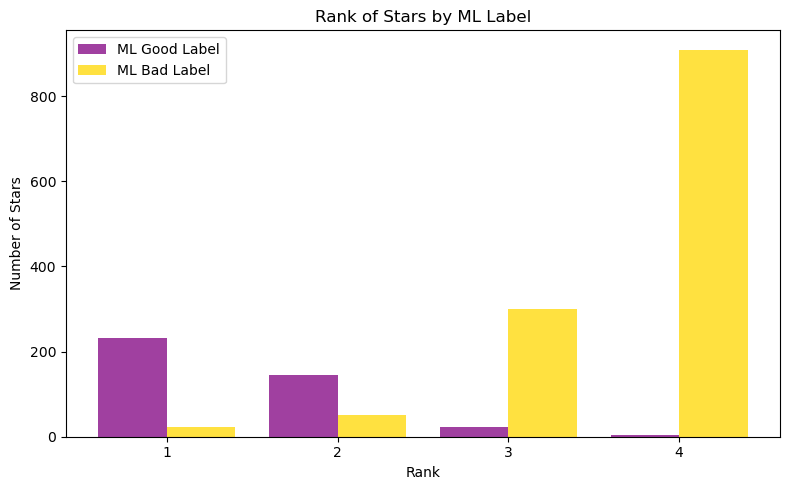

In [35]:
rank_counts_good = y_pred_good['rank'].value_counts().sort_index()
rank_counts_bad = y_pred_bad['rank'].value_counts().sort_index()

ranks = [1, 2, 3, 4]
good_vals = [rank_counts_good.get(r, 0) for r in ranks]
bad_vals = [rank_counts_bad.get(r, 0) for r in ranks]

x = np.arange(len(ranks))  # [0, 1, 2, 3]
bar_width = 0.4



fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - bar_width/2, good_vals, width=bar_width, color='purple', label='ML Good Label', alpha=0.75)
ax.bar(x + bar_width/2, bad_vals, width=bar_width, color='gold', label='ML Bad Label', alpha=0.75)


ax.set_xlabel('Rank')
ax.set_ylabel('Number of Stars')
ax.set_title('Rank of Stars by ML Label')
ax.set_xticks(x)
ax.set_xticklabels(ranks)
ax.legend()

plt.tight_layout()
plt.show()